# Instituto Tecnológico y de Estudios Superiores de Occidente
## Master in Data Science
## Convex Optimization
## Final Project
## Psychological treatment prediction

### Professor: 
- Dr. Juan Diego Sanchez Torres

### Team: 
- María Elisa Vaca Gómez 
- Alejandra Paola Galindo Hernández
- Jesús Rodrigo Ponce González
- Aldo Emmanuel Villarreal Palomino

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import missingno as ms
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## Problem Description

The following survey was conducted to employees who work in the IT department, the main purpose of the survey is to understand the mental health status within the same department. The data was obtained from Mental Health in Tech Survey

The project’s main purpose is to test **Support Vector Classifier** with different kernel to predict if a person will receive treatment or not, given the survey’s variables and by identifying which ones are more relevant.



## Variables

### Outcome variable
- **treatment:** Have you sought treatment for a mental health condition?

### Predictive variables
- **Timestamp**
- **Age**
- **Gender**
- **Country**
- **state:** If you live in the United States, which state or territory do you live in?
- **self_employed:** Are you self-employed?
- **family_history:** Do you have a family history of mental illness?
- **work_interfere:** If you have a mental health condition, do you feel that it interferes with your work?
- **no_employees:** How many employees does your company or organization have?
- **remote_work:** Do you work remotely (outside of an office) at least 50% of the time?
- **tech_company:** Is your employer primarily a tech company/organization?
- **benefits:** Does your employer provide mental health benefits?
- **care_options:** Do you know the options for mental health care your employer provides?
- **wellness_program:** Has your employer ever discussed mental health as part of an employee wellness program?
- **seek_help:** Does your employer provide resources to learn more about mental health issues and how to seek help?
- **anonymity:** Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?
- **leave:** How easy is it for you to take medical leave for a mental health condition?
- **mentalhealthconsequence:** Do you think that discussing a mental health issue with your employer would have negative consequences?
- **physhealthconsequence:** Do you think that discussing a physical health issue with your employer would have negative consequences?
- **coworkers:** Would you be willing to discuss a mental health issue with your coworkers?
- **supervisor:** Would you be willing to discuss a mental health issue with your direct supervisor(s)?
- **mentalhealthinterview:** Would you bring up a mental health issue with a potential employer in an interview?
- **physhealthinterview:** Would you bring up a physical health issue with a potential employer in an interview?
- **mentalvsphysical:** Do you feel that your employer takes mental health as seriously as physical health?
- **obs_consequence:** Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?
- **comments:** Any additional notes or comments


## Survey Database

In [ ]:
df = pd.read_csv("survey1.csv")
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


## Data Cleansing

### Replacing Gender

Since the data came from a survey there are some values that are not correctly written, therefore a data cleanse was done to only have 3 categories.

In [ ]:
# Replacing Gender
print(df.Gender.unique())
df = df.replace(to_replace = ["Male","Male ", "Malr","Mail", "Make","Mal","msle","M","m","male","maile","Male (CIS)", "Cis Male", "cis male", "Cis Man","Cis Male","something kinda male?","ostensibly male, unsure what that really means"], value = "Man")
df = df.replace(to_replace = ["woman","Female","Female ", "f","F","femail","Femake","female","cis-female/femme", "Female (cis)","Cis Female"], value = "Woman")
df = df.replace(to_replace = ["Trans woman","Female (trans)","Trans-female","Woman_Trans","non-binary","queer/she/they","Genderqueer","queer","fluid","Enby","Male-ish", "Guy (-ish) ^_^","A little about you","Agender","Non-binary","p","Neuter","Nah","male leaning androgynous","Androgyne","All"], value = "Others")
print(df.Gender.unique())

['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means']
['Woman' 'Man' 'Others']


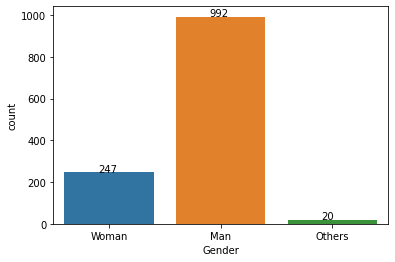

In [ ]:
# Gender countplot
ax = sns.countplot(x = "Gender", data = df)
for p in ax.patches:
   ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.30, p.get_height()+1.5))

### Min and Max ages

The minimum age captured in the survey is -1726 and the maximum 99999999999, which do not make sense, we made a boxplot to identify how many outliers we have in the data and then we proceeded to replace those observations with an age no more than 72 and no less than 18.

In [ ]:
# Min and Max ages
print(min(df.Age))
print(max(df.Age))

-1726
99999999999


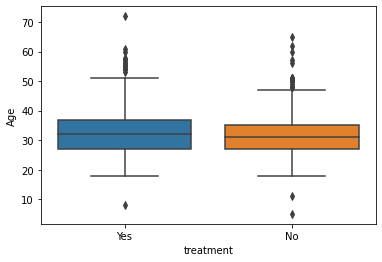

In [ ]:
# Boxplot with outliers
sns.boxplot(y = df[(df.Age <= 120) & (df.Age >= 0)].Age, x = df.treatment)

In [ ]:
# Age cleaning
df.Age = np.where(df.Age <= 18, 18, df.Age)
df.Age = np.where(df.Age >= 72, 72, df.Age)
df.Age.describe()

count    1259.000000
mean       32.073074
std         7.500677
min        18.000000
25%        27.000000
50%        31.000000
75%        36.000000
max        72.000000
Name: Age, dtype: float64

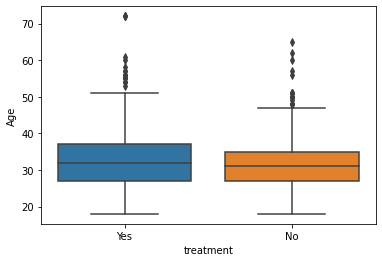

In [ ]:
sns.boxplot(y = df.Age, x = df.treatment)

### Employees NA

We made a plot where we can see that the variable `self_employed` has 18 missing values. To replace those values we reviewed the variable `tech_company`, if the person works in a tech company is labeled as **"No"** and if the person does not work in a tech company is labeled as **"Yes"**.

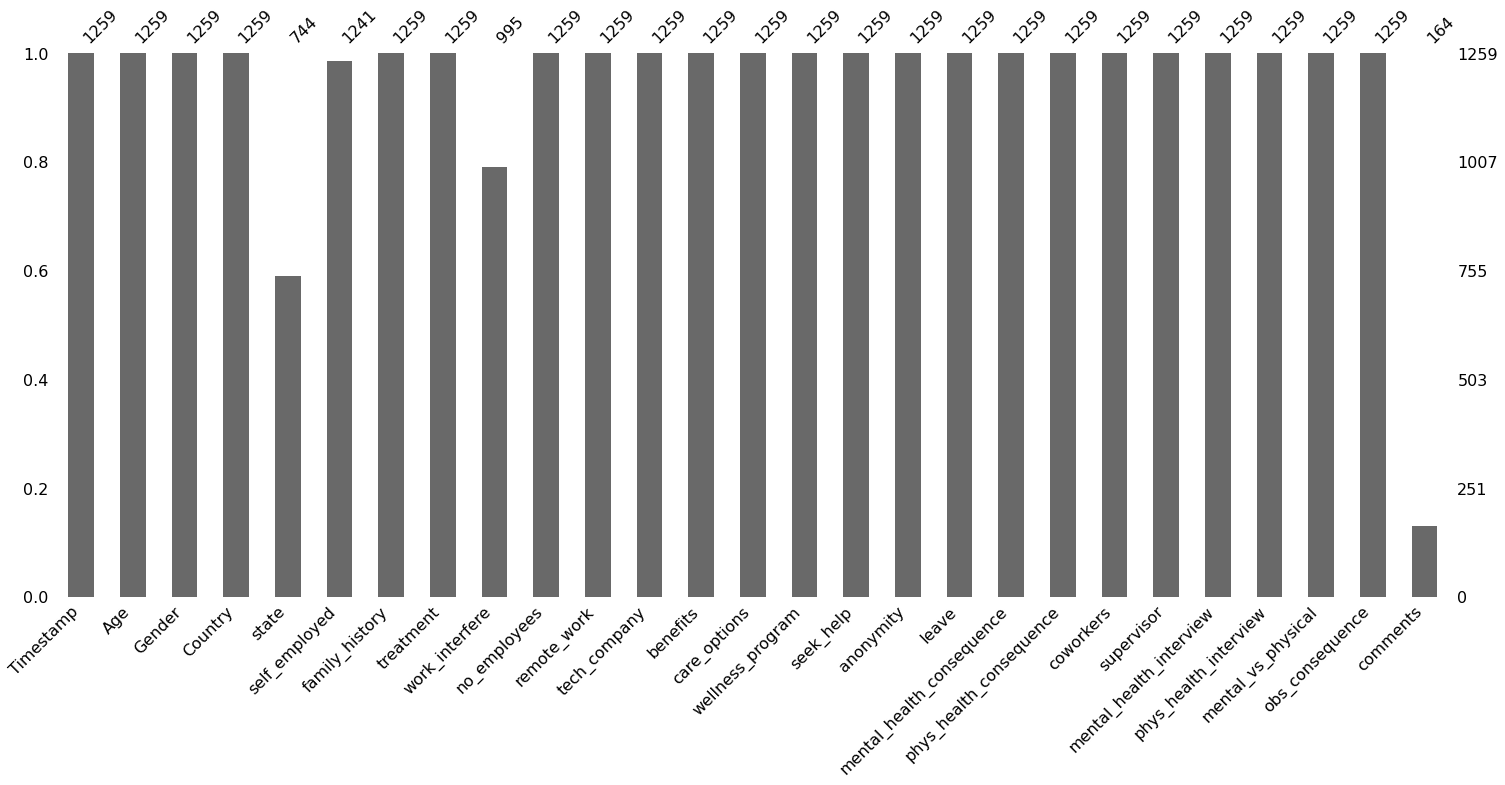

In [ ]:
ms.bar(df)

In [ ]:
 # Employees NA
df[df.self_employed.isna()][["self_employed","tech_company"]].head()

,self_employed,tech_company
0,NaN,Yes
1,NaN,No
2,NaN,Yes
3,NaN,Yes
4,NaN,Yes


In [ ]:
df.self_employed = np.where((df.self_employed.isna()) & (df.tech_company == "No"), "Yes", df.self_employed)
df.self_employed = np.where((df.self_employed.isna()) & (df.tech_company == "Yes"), "No", df.self_employed)
df.self_employed.describe()
df.self_employed.unique()

array(['No', 'Yes'], dtype=object)

## Data Exploration

### Target Variable `treatment`

As we can see on the following chart, the outcome variable is well balanced (637 Yes, 622 No).


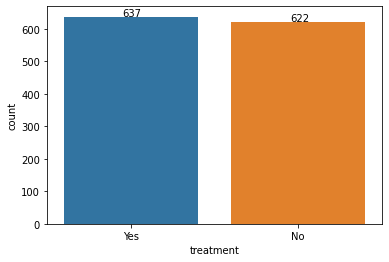

In [ ]:
# Target Variable {treatment}
ax = sns.countplot(x = df.treatment, data = df)
for p in ax.patches:
   ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+1.5))


The following analysis per variable is a first approach to determine if a variable has a possible correlation between the categorical variables and the target. 

### Target Variable vs `Age`

The age of the people who received treatment is slightly higher than those who didn't.


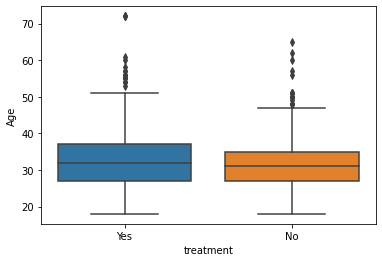

In [ ]:
sns.boxplot(y = df.Age, x = df.treatment)

### Target Variable vs `Gender`

The % of people to receive treatment by `gender` are:
- Women: 68%
- Man: 45%
- Others:85%

Being a women could rise the probability to receive treatment.



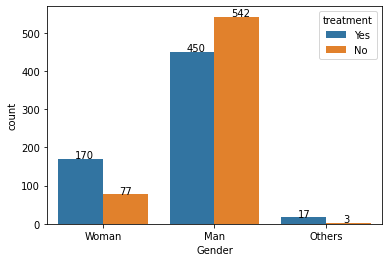

In [ ]:
#Gender Count with treatment
ax = sns.countplot(x = df.Gender, data = df, hue = df.treatment)
for p in ax.patches:
   ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1.5))

### Target Variable vs `Self_employed`

The % of people who receive treatment by `Self_employed` are:


*   Yes: 57%
*   No: 51%

Being self employed by first impression does not show a notable difference in  the probability to receive treatment.


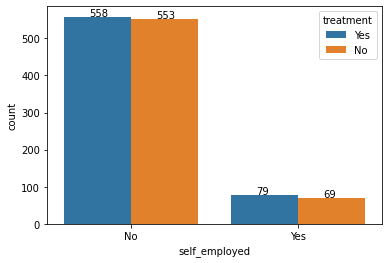

In [ ]:
# Self employed Count with treatment
ax = sns.countplot(x = df.self_employed, data = df, hue = df.treatment)
for p in ax.patches:
   ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1.5))


### Target Variable vs `Family_history`

The % of people to receive treatment by `Family_history` are:

- Yes: 74%
- No: 37%

By having a family history of mental illness the probability of needing treatment could rise.

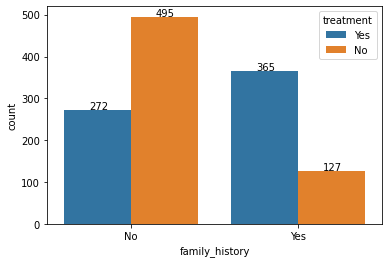

In [ ]:
# Family history Count with treatment
ax = sns.countplot(x = df.family_history, data = df, hue = df.treatment)
for p in ax.patches:
   ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1.5))

### Target Variable vs `work_interfere`

The % of people to receive treatment and `work_interfere` are:

- Often: 87%
- Sometimes: 77%
- Rarely:71%
- Never:14%


There is a significant difference between the categories `never` and `often`, which could indicate that this is a variable with a strong influence on the outcome. 

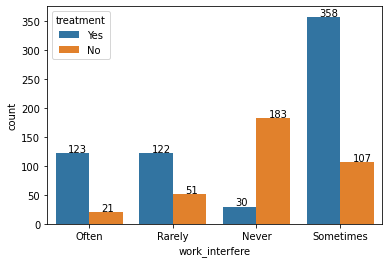

In [ ]:
ax = sns.countplot(x = df.work_interfere, data = df, hue = df.treatment)
for p in ax.patches:
   ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1.5))

### Target Variable vs `no_employees`

The % of people to receive treatment by `no_employees` are:

*   1 to 5: 60%
*   6 to 25: 48%
*   26 to 100:54%
*   100 to 500:57%
*   500 to 1000:43%
*   $>$ 1000:50%

Considering the maximum is 60% and the minimum is 43%, this gap could indicate a correlation between the number of employees in the company and the probability of receiving treatment.

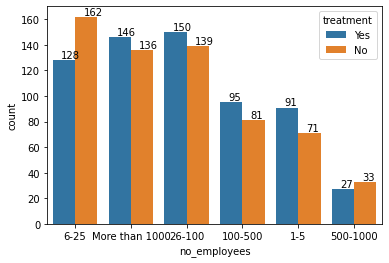

In [ ]:
ax = sns.countplot(x = df.no_employees, data = df, hue = df.treatment)
for p in ax.patches:
   ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1.5))

### Target Variable vs `remote_work`

The % of people to receive treatment by `remote_work` are:

*   Yes: 54%
*   No: 52%

There is a small variation between the two categories, this variable could be irrelevant by itself to the outcome variable.

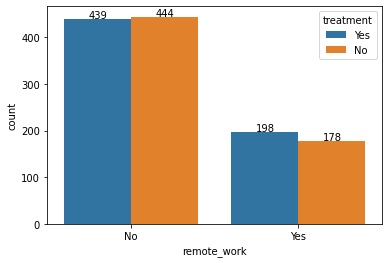

In [ ]:
ax = sns.countplot(x = df.remote_work, data = df, hue = df.treatment)
for p in ax.patches:
   ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1.5))




### Target Variable vs `Tech_company`

The % of people to receive treatment by `Tech_company` are:

*   Yes: 52%
*   No: 54%

As the previous variable, there is also a small variation between the two categories, this variable could be irrelevant by itself to the outcome variable.

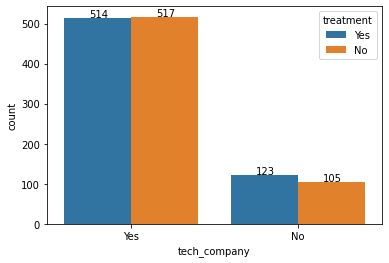

In [ ]:
ax = sns.countplot(x = df.tech_company, data = df, hue = df.treatment)
for p in ax.patches:
   ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1.5))

### Target Variable vs `benefits`

The % of people to receive treatment by `benefits`:

*   Yes: 64%
*   No: 53%
*   Don't know: 39%

There is a significant variation between the 39% minimum and the 64% maximum, which could indicate a correlation between this variable and the outcome. 

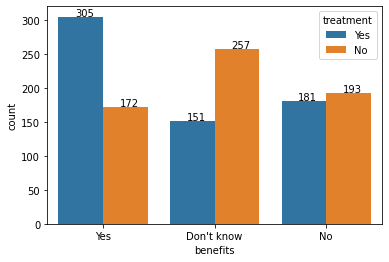

In [ ]:
ax = sns.countplot(x = df.benefits, data = df, hue = df.treatment)
for p in ax.patches:
   ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1.5))

### Target Variable vs `care_options`

The % of people to receive treatment by `care_options` are:

*   Yes: 70%
*   No: 45%
*   Not Sure: 39%

The people who answered yes to this question in 70% of the cases have received psychological treatment.

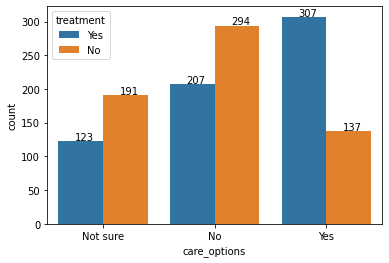

In [ ]:
ax = sns.countplot(x = df.care_options, data = df, hue = df.treatment)
for p in ax.patches:
   ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1.5))

### Target Variable vs `wellness_program`

The % of people to receive treatment by `wellness_program`:

*   Yes: 59%
*   No: 52%
*   Don't know: 45%

The results for this variable are very close, which could indicate that there is no correlation between this variable and the outcome.

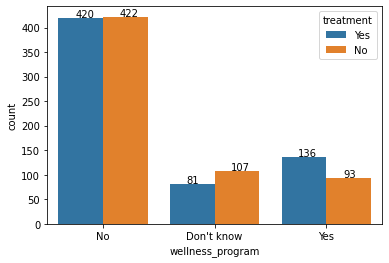

In [ ]:
ax = sns.countplot(x = df.wellness_program, data = df, hue = df.treatment)
for p in ax.patches:
   ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1.5))

### Target Variable vs `seek_help`

The % of people to receive treatment by `seek_help` are:

*   Yes: 58%
*   No: 52%
*   Don't know: 49%

The gap between the maximum and the minumum percentage is 9 percentual points, which could indicate that there is correlation between this variable and the outcome.

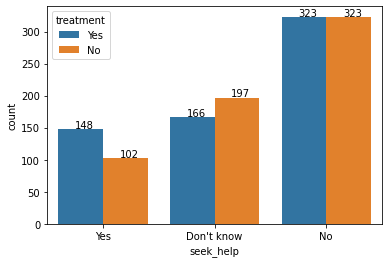

In [ ]:
ax = sns.countplot(x = df.seek_help, data = df, hue = df.treatment)
for p in ax.patches:
   ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1.5))

### Target Variable vs `anonymity`

The % of people to receive treatment by anonymity` are:

*   Yes: 62%
*   No: 56%
*   Don't know: 48%

There is a 14 porcentual points gap between maximum and minimum, which could indicate an influence on the output variable.

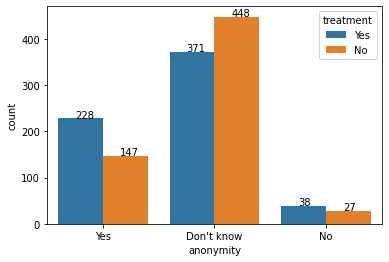

In [ ]:
ax = sns.countplot(x = df.anonymity, data = df, hue = df.treatment)
for p in ax.patches:
   ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1.5))

### Target Variable vs `leave`

The % of people to receive treatment by `leave` are:

*   Very difficult: 71%
*   Somewhat difficult: 64%
*   Very easy: 53%
*   Somewhat easy: 51%
*   Don't know: 47%

There a significant gap of 24 porcentual points between maximum and minimum, which could indicate an influence on the output variable.

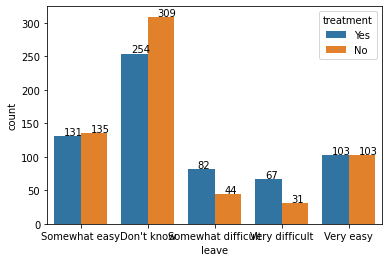

In [ ]:
ax = sns.countplot(x = df.leave, data = df, hue = df.treatment)
for p in ax.patches:
   ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1.5))

### Target Variable vs `mental_health_consequence`

The % of people to receive treatment by `mental_health_consequence` are:

*   Yes: 60%
*   No: 46%
*   Maybe: 53%

There a significant gap of 14 porcentual points between maximum and minimum, which could indicate an influence on the output variable.

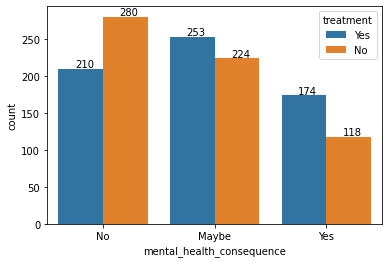

In [ ]:
ax = sns.countplot(x = df.mental_health_consequence, data = df, hue = df.treatment)
for p in ax.patches:
   ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1.5))

### Target Variable vs `phys_health_consequence`

The % of people to receive treatment by `phys_health_consequence` are:

*   Yes: 57%
*   No: 51%
*   Maybe: 56%

There is a gap of 6 porcentual points between maximum and minimum, which could indicate a lack  of influence on the output variable.

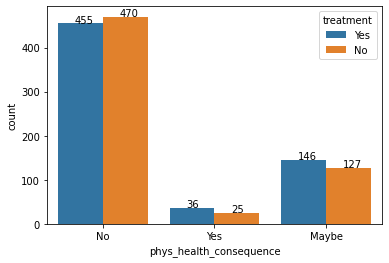

In [ ]:
ax = sns.countplot(x = df.phys_health_consequence, data = df, hue = df.treatment)
for p in ax.patches:
   ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1.5))

### Target Variable vs `coworkers`

The % of people to receive treatment by `coworkers` are:

- Yes: 63%
- No: 44%
- Some of them: 52%

There is a gap of of 19 porcentual points between maximum and minimum, which could indicate influence on the output variable.

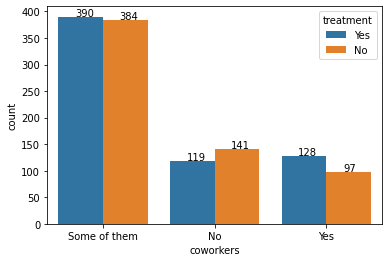

In [ ]:
ax = sns.countplot(x = df.coworkers, data = df, hue = df.treatment)
for p in ax.patches:
   ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1.5))

### Target Variable vs `supervisor`

The % of people to receive treatment by `supervisor` are:

*   Yes: 51%
*   No: 52%
*   Some of them: 55%

There is a gap of of 4 porcentual points between maximum and minimum, which could indicate a lack of influence on the outcome variable if the person is willing to talk with his supervisor about the mental health issue.

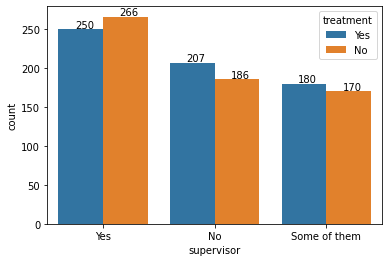

In [ ]:
ax = sns.countplot(x = df.supervisor, data = df, hue = df.treatment)
for p in ax.patches:
   ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1.5))

### Target Variable vs `mental_health_interview`

The % of people to receive treatment by `mental_health_interview` are:

*   Yes: 65%
*   No: 54%
*   Maybe: 42%

There is a gap of of 9 porcentual points between maximum and minimum, this could indicate influence on the output variable.

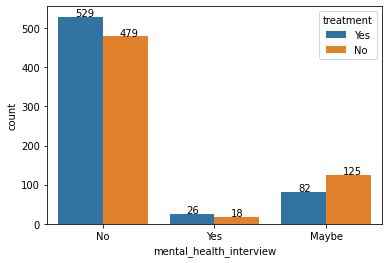

In [ ]:
ax = sns.countplot(x = df.mental_health_interview, data = df, hue = df.treatment)
for p in ax.patches:
   ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1.5))

### Target Variable vs `phys_health_interview`

The % of people to receive treatment by `phys_health_interview` are:

*   Yes: 56%
*   No: 52%
*   Maybe: 51%

There is a gap of of 5 porcentual points between maximum and minimum, this could indicate a lack of influence on the outcome variable if a person bring up a physical issue in an interview.

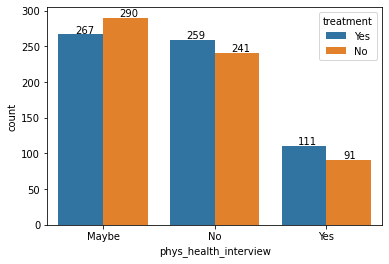

In [ ]:
ax = sns.countplot(x = df.phys_health_interview, data = df, hue = df.treatment)
for p in ax.patches:
   ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1.5))

### Target Variable vs `mental_vs_physical`

The % of people to receive treatment by `mental_vs_physical` are:

*   Yes: 61%
*   No: 61%
*   Maybe: 47%

There is a clear difference when the answer "Don't know" to this questions on the outcome variable.

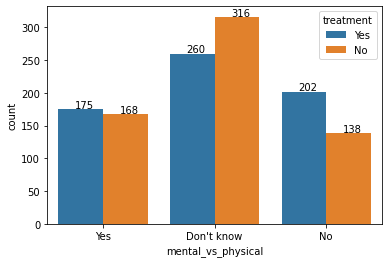

In [ ]:
ax = sns.countplot(x = df.mental_vs_physical, data = df, hue = df.treatment)
for p in ax.patches:
   ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1.5))

### Target Variable vs `obs_consequence`

The % of people to receive treatment are as follows by **obs_consequence**:

*   Yes: 68%
*   No: 49%

There is a clear difference when the answer  to this questions is "Yes" on the outcome variable.

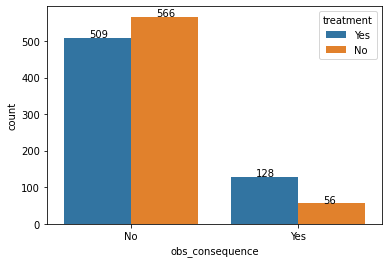

In [ ]:
ax = sns.countplot(x = df.obs_consequence, data = df, hue = df.treatment)
for p in ax.patches:
   ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1.5))

## Variable Selection


### Variable Importance

Due to the lack of importance on the outcome variable previously analyzed we decided to not consider the following varibles:

- `self_employed`
- `remote_work`
- `tech_company`
- `wellness_program`
- `supervisor`
- `phys_health_interview`
- `phys_health_consequence`

### Variables with NA

During the analysis we identified some variables with NA, so we decided to do not considered in the model:

- `state`
- `comments`
- `work_interfere`


In [ ]:
df1=df.drop(['state','comments','work_interfere','Timestamp','Country'], axis = 1)
df1.columns

Index(['Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'no_employees', 'remote_work', 'tech_company', 'benefits',
       'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

## Data Preprocessing

Due to the Support Vector Machine functionality we transform the categorical variables to dummy variable encoding, making sure that we have *k-1* variables to avoid *redundancy*.

In [ ]:
df2=pd.get_dummies(df1,columns=['Gender','self_employed',
       'family_history', 'treatment','no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],drop_first=True)
df2=df2.rename(columns={'treatment_Yes':'treatment'})
df2.columns

Index(['Age', 'Gender_Others', 'Gender_Woman', 'self_employed_Yes',
       'family_history_Yes', 'treatment', 'no_employees_100-500',
       'no_employees_26-100', 'no_employees_500-1000', 'no_employees_6-25',
       'no_employees_More than 1000', 'remote_work_Yes', 'tech_company_Yes',
       'benefits_No', 'benefits_Yes', 'care_options_Not sure',
       'care_options_Yes', 'wellness_program_No', 'wellness_program_Yes',
       'seek_help_No', 'seek_help_Yes', 'anonymity_No', 'anonymity_Yes',
       'leave_Somewhat difficult', 'leave_Somewhat easy',
       'leave_Very difficult', 'leave_Very easy',
       'mental_health_consequence_No', 'mental_health_consequence_Yes',
       'phys_health_consequence_No', 'phys_health_consequence_Yes',
       'coworkers_Some of them', 'coworkers_Yes', 'supervisor_Some of them',
       'supervisor_Yes', 'mental_health_interview_No',
       'mental_health_interview_Yes', 'phys_health_interview_No',
       'phys_health_interview_Yes', 'mental_vs_physical_N

In [ ]:
df2.head()

,Age,Gender_Others,Gender_Woman,self_employed_Yes,family_history_Yes,treatment,no_employees_100-500,no_employees_26-100,no_employees_500-1000,no_employees_6-25,...,coworkers_Yes,supervisor_Some of them,supervisor_Yes,mental_health_interview_No,mental_health_interview_Yes,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_No,mental_vs_physical_Yes,obs_consequence_Yes
0,37,0,1,0,0,1,0,0,0,1,...,0,0,1,1,0,0,0,0,1,0
1,44,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2,32,0,0,0,0,0,0,0,0,1,...,1,0,1,0,1,0,1,1,0,0
3,31,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
4,31,0,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,1,0,0,0


### Data Split

We split the data into *train 60%*, *validation 20%* and *test 20%*, and afterwards the data is scaled.




In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df2.drop(['treatment'], axis=1), df2.treatment, test_size=0.2, random_state=109)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Support Vector Classifier - L2

**Primal**

$$\min_{w, b, \xi} \mathcal{P}(w, \xi)=\frac{1}{2} w^{T} w+ \frac{c}{2} \sum_{k=1}^{N} \xi_{k}^{2}$$


$$
\begin{array}{l}
s.t.\;\;\; y_{k}\left[w^{T} \varphi\left(x_{k}\right)+b\right] \geq 1-\xi_{k}, \quad k=1, \ldots, N \\
\end{array}
\\
$$

where $y_{k} \in\{-1,1\}$ is the response (target) variable, $\xi_{k} \in \mathbb{R}^{n}$ are slack variables, and $c>0$. The feature maps have the form $\varphi(\cdot): \mathbb{R}^{n} \rightarrow \mathbb{R}^{m}$. Then, the model's parameters are $w \in \mathbb{R}^{m}$ and $b \in \mathbb{R}$.

**Dual Function**

$$D(\alpha)_{\max \alpha}=-\frac{1}{2} \sum_{l,k=1}^{N} \alpha_{l} \alpha_{k} y_{l} y_{k} \varphi\left(x_{l}\right)^{\top} \varphi\left(x_{k}\right)-\frac{1}{2 c} \sum_{l,k=1}^{N} \alpha_{k} \alpha_{l}+\sum_{k=1}^{N} \alpha_{k}$$


$$s.t. \sum_{k=1}^{N} \alpha_{k} y_{k}=0,\   \alpha_{k} \geq 0,\  k=1, \ldots, N$$

#### SVM Classifier with RBF Kernel

Radial Basis Function Kernel is one of the most used due to it's similarity to Gaussian distribution.

The RFB computes how close are the points to each other, for two point $X_{1}$ and $X_{2}$ can be mathematically expressed as:

$$K(X_{1},X_{2})=exp(-\frac{||X_{1}-X_{2}||^{2}}{2\sigma^{2}})$$

where 
- $\sigma$ is the variance and the hyperparameter.
- $||X_{1}-X_{2}||$ is the Euclidean (L2-norm) distance between the points.

The maximum value than the RBF Kernel can take is 1 and it happens whe the distance between the points is cero $||X_{1}-X_{2}||$.

- When the points are the same, there is no distance between them and therefore they are extremely similar.

- When the points are separated by a large distance, then the kernel value is less than 1 and close to 0 which would mean that the points are dissimilar.

It is important to find the right value of $\sigma$ to identify which points should be considered similar.


##### Hyperparameters tuning

Cross Validation Method was performed with 5-folds to optimize the hyperparameters using `f1`metric.


In [ ]:
tuned_parameters = [{"kernel": ["rbf"], "gamma":[0.1, 0.01, 0.001, 0.0001], "C": [0.01,0.1,0.2,0.5,1,1.1,2.5,5,10,25,50,70,80,100,1000]},]


grid_rbf = GridSearchCV(SVC(), tuned_parameters, scoring='f1')
grid_rbf.fit(X_train,y_train)

grid_rbf.best_params_


{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

In [ ]:
grid_rbf.best_score_

0.718512401051983

##### Training

Now with the train data an SVC model is trained using the optimal hyperparameters `C = 100` and `Gamma = 0.001`.

In [ ]:
# Creating SVM Model classifier
svm_rbf = svm.SVC(kernel="rbf", C = 100, gamma = 0.001)
# Train the model
svm_rbf.fit(X_train,y_train)

SVC(C=100, gamma=0.001)

##### Predictions and Performance

We used the test data to estimate the outcome variable.

In [ ]:
# Predict the response
pred_rbf = svm_rbf.predict(X_test)
pred_rbf[0:5]

array([0, 0, 0, 0, 1], dtype=uint8)

###### Confusion Matrix


In [ ]:
cm_rbf = confusion_matrix(y_test, pred_rbf)
pd.DataFrame(cm_rbf, columns=['No','Yes'],index=["No","Yes"])

,No,Yes
No,99,26
Yes,42,85


###### Accuracy
TruePositive + TrueNegative/All Observations

In [ ]:
acctest_rbf = round((cm_rbf[0,0]+cm_rbf[1,1])/(np.sum(cm_rbf)),3)
acctest_rbf

0.73

###### Sensitivity

TruePositive/(TruePositive + FalseNegative)



In [ ]:
senstest_rbf = round(cm_rbf[1,1]/(cm_rbf[1,1]+cm_rbf[1,0]),3)
senstest_rbf

0.669

###### Specificity
TrueNegative/(TrueNegative + FalsePostive)

In [ ]:
spectest_rbf = round(cm_rbf[0,0]/(cm_rbf[0,0]+cm_rbf[0,1]),3)
spectest_rbf

0.792

#### SVM Classifier with Sigmoid Kernel

The Sigmoid Kernel comes from the Neural Networks field, where the bipolar sigmoid function is often used as an activation function for artificial neurons.

$$K(X_{1},X_{2})= tanh (\alpha X_{1}^{T} X_{2} + coef0)$$

The kernel must satisfy Mercer’s theorem, and that requires that the kernel be positive definite. However, the Sigmoid kernel, which, despite it is wide use, it is not positive semi-definite for certain values of its hyperparameters. 

The hyperparameter $\alpha$ and $c$ must be properly chosen otherwise, the results may be drastically wrong, so much so that the SVM performs worse than random. 




##### Hyperparameters tuning

Cross Validation Method was performed with 5-folds to optimize the hyperparameters using `f1` metric.

In [ ]:
tuned_parameters = [{"kernel": ["sigmoid"], "gamma":[0.1, 0.01, 0.001, 0.0001], 'C':[0.01,0.1,0.2,0.5,1], "coef0":[0.1,0.2,0.5,1,5]}]


grid_sig = GridSearchCV(SVC(), tuned_parameters, scoring='f1')
grid_sig.fit(X_train,y_train)

grid_sig.best_params_

{'C': 0.5, 'coef0': 0.2, 'gamma': 0.001, 'kernel': 'sigmoid'}

In [ ]:
grid_sig.best_score_

0.7203498038605686

##### Training

Now with the train data an SVC model is trained using the optimal hyperparameters `C = 1`, `gamma = 0.01` and `coef0 = 0.2`.

In [ ]:
# Create a Classifer
svm_sig = svm.SVC(kernel="sigmoid", C = 0.5, gamma = 0.001, coef0=0.2)
# Train the model
svm_sig.fit(X_train,y_train)

SVC(C=0.5, coef0=0.2, gamma=0.001, kernel='sigmoid')

##### Predictions and Performance

We used the test data to estimate the outcome variable.

In [ ]:
# Predict the response
pred_sig = svm_sig.predict(X_test)
pred_sig[0:5]

array([0, 0, 0, 0, 1], dtype=uint8)

###### Confusion Matrix


In [ ]:
cm_sig = confusion_matrix(y_test, pred_sig)
pd.DataFrame(cm_sig, columns=['No','Yes'],index=["No","Yes"])

,No,Yes
No,105,20
Yes,51,76


###### Accuracy
TruePositive + TrueNegative/All Observations

In [ ]:
acctest_sig = round((cm_sig[0,0]+cm_sig[1,1])/(np.sum(cm_sig)),3)
acctest_sig

0.718

###### Sensitivity

TruePositive/(TruePositive + FalseNegative)



In [ ]:
senstest_sig = round(cm_sig[1,1]/(cm_sig[1,1]+cm_sig[1,0]),3)
senstest_sig

0.598

###### Specificity
TrueNegative/(TrueNegative + FalsePostive)

In [ ]:
spectest_sig = round(cm_sig[0,0]/(cm_sig[0,0]+cm_sig[0,1]),3)
spectest_sig

0.84

#### Random Forest

We developed a Random Forest Model to compare and validate the results from the Support Vector Classification model. 

##### Hyperparameters tuning

Cross Validation Method was performed with 5-folds to optimize the hyperparameters using metrics `f1`metric.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

tuned_parameters = [{'max_depth':[3,5,10,15],"n_estimators":[10,30,50],'max_leaf_nodes':[5,25,50]}]

grid_rf = GridSearchCV(RandomForestClassifier(), tuned_parameters, scoring='f1')
grid_rf.fit(X_train,y_train)

grid_rf.best_params_


{'max_depth': 15, 'max_leaf_nodes': 5, 'n_estimators': 50}

In [ ]:
grid_rf.best_score_

0.7172967189445576

##### Training

Now with the train data a Random Forest model is trained using the optimal hyperparameters `max_depth = 15`, `max_leaf_nodes = 5`, and `n_estimators = 50`.

In [ ]:
# Create a classifier
rf = RandomForestClassifier(max_depth=15, max_leaf_nodes=5, n_estimators=50)
# Train the model
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=15, max_leaf_nodes=5, n_estimators=50)

##### Predictions and Performance

We used the test data to estimate the outcome variable.

In [ ]:
# Predict the response
pred_rf = rf.predict(X_test)
pred_rf[0:5]

array([0, 0, 0, 0, 1], dtype=uint8)

###### Confusion Matrix


In [ ]:
cm_rf = confusion_matrix(y_test, pred_rf)
pd.DataFrame(cm_rf, columns=['No','Yes'],index=["No","Yes"])

,No,Yes
No,99,26
Yes,38,89


###### Accuracy
TruePositive + TrueNegative/All Observations

In [ ]:
acctest_rf = round((cm_rf[0,0]+cm_rf[1,1])/(np.sum(cm_rf)),3)
acctest_rf

0.746

###### Sensitivity

TruePositive/(TruePositive + FalseNegative)



In [ ]:
senstest_rf = round(cm_rf[1,1]/(cm_rf[1,1]+cm_rf[1,0]),3)
senstest_rf

0.701

###### Specificity
TrueNegative/(TrueNegative + FalsePostive)

In [ ]:
spectest_rf = round(cm_rf[0,0]/(cm_rf[0,0]+cm_rf[0,1]),3)
spectest_rf

0.792

#### Kernel SVC - Comparison

In [ ]:
results=pd.DataFrame(np.array([acctest_rbf,acctest_sig,acctest_rf,senstest_rbf,senstest_sig,senstest_rf,spectest_rbf,spectest_sig,spectest_rf]).reshape(3,3),columns=["SVC_RBF","SVC_Sigmoid","RandomForest"],index=["Accuracy","Sensitivity","Specificity"])
results=results.astype({"SVC_RBF":float})
results=results.astype({"SVC_Sigmoid":float})
results=results.astype({"RandomForest":float})
results


,SVC_RBF,SVC_Sigmoid,RandomForest
Accuracy,0.730,0.718,0.746
Sensitivity,0.669,0.598,0.701
Specificity,0.792,0.840,0.792


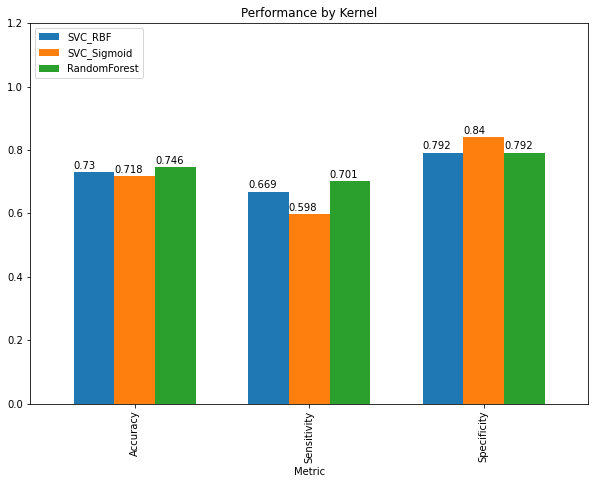

In [ ]:
ax=results.plot(kind="bar",width=.7,figsize=(10,7))
plt.title("Performance by Kernel")
plt.xlabel("Metric")
plt.legend(loc='upper left')
plt.ylim(0,1.2)

for p in ax.patches:
   ax.annotate('{:}'.format(p.get_height()), (p.get_x(), p.get_height()+.01))

#### Conclusions

3 Models were developed:

- Support Vector Classifier with Radial Basis Function Kernel
- Support Vector Classifier with sigmoid Kernel
- Random Forest

After hyperparameter optimization we can see that the difference between RBF Kernel and Sigmoid Kernel in accuracy is 1.2 percentual points which could be enough reason to choose RBF, additionally this decision is reinforced by analyzing sensitivity because the difference is 7.1 percentual points, that is  more than the double of the difference in accuracy.

The SVC requires a linear separable data and kernel hyperparameters optimization which can be sensible to a wrong selection. Due to the type of predictors we have in this problem, we used as a benchmark capability binary classification model *Random Forest* considering that the vast majority of the predictors are binary. 

The obtained results for Random Forest in comparison with SVC RBF showed a better performace in 2 metrics, accuracy 1.6 percentual points and sensitivity 3.2 percentual points.

Due to the size of the data it is not considered the execution time for the models.

Even though the highest accuracies are Random Forest *(73%)* and SVC with Radial Basis Function (RBF) Kernel *(74.6%)*, it can be considered as acceptable and can be used for mental health decision making, due to the problem’s context which tries to predict and model human behavior.